# 🧠 Sesión 2.2: Transformación de Datos y Consumo de APIs

### 🎯 Objetivos:
- Realizar transformaciones complejas en `pandas`
- Aplicar funciones personalizadas
- Consumir y analizar datos desde APIs públicas
- Resolver ejercicios de análisis y visualización de datos

## 🔧 1. Librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## 📊 2. Cargar dataset base, agrupamiento y funciones estadísticas (`groupby`)


In [4]:
url_csv='https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'


# Cargar nuevamente el dataset 'tips'
df_tips = pd.read_csv(url_csv)
df_tips.columns = [col.lower().strip() for col in df_tips.columns]
# Aseguramos que no haya nulos para el análisis
df_tips.dropna(inplace=True) 

# Agrupar por día y calcular estadísticas básicas de 'total_bill'
agrupado_por_dia = df_tips.groupby('day')['total_bill'].agg(['count', 'mean', 'sum'])
print("Agrupamiento por día (total_bill):")
print(agrupado_por_dia)


Agrupamiento por día (total_bill):
      count       mean      sum
day                            
Fri      19  17.151579   325.88
Sat      87  20.441379  1778.40
Sun      76  21.410000  1627.16
Thur     62  17.682742  1096.33


Usamos `groupby('day')` para agrupar filas por el día de la semana y luego `agg()` para calcular el conteo, la media y la suma del `total_bill` para cada día.

### **Tarea Adicional para el Estudiante (Compartir Código y Criterios):**

*   **Agrupamiento Múltiple:** Agrupa los datos por `day` y `sex` y calcula la propina (`tip`) promedio y máxima para cada combinación.
*   ¿Cómo interpretarías los resultados que obtienes para el día 'Sat' y 'Sun' comparados con 'Fri' y 'Thur'? ¿Qué insights podrías extraer sobre los hábitos de gasto?

In [ ]:
# Tu código de agrupamiento múltiple y comentarios aquí

## 🧪 Ordenamiento, Filtrado y Condiciones

In [6]:
# Ordenar el DataFrame por 'total_bill' de forma descendente
df_ordenado = df_tips.sort_values(by='total_bill', ascending=False)
print("Dataset ordenado por total_bill (primeras 5 filas):")
print(df_ordenado.head())

# Filtrar por total_bill mayor a 40
filtro_alto_gasto = df_ordenado[df_ordenado['total_bill'] > 40]
print("\nClientes con gasto mayor a $40:")
print(filtro_alto_gasto)


Dataset ordenado por total_bill (primeras 5 filas):
     total_bill    tip   sex smoker  day    time  size
170       50.81  10.00  Male    Yes  Sat  Dinner     3
212       48.33   9.00  Male     No  Sat  Dinner     4
59        48.27   6.73  Male     No  Sat  Dinner     4
156       48.17   5.00  Male     No  Sun  Dinner     6
182       45.35   3.50  Male    Yes  Sun  Dinner     3

Clientes con gasto mayor a $40:
     total_bill    tip     sex smoker   day    time  size
170       50.81  10.00    Male    Yes   Sat  Dinner     3
212       48.33   9.00    Male     No   Sat  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
156       48.17   5.00    Male     No   Sun  Dinner     6
182       45.35   3.50    Male    Yes   Sun  Dinner     3
102       44.30   2.50  Female    Yes   Sat  Dinner     3
197       43.11   5.00  Female    Yes  Thur   Lunch     4
142       41.19   5.00    Male     No  Thur   Lunch     5
184       40.55   3.00    Male    Yes   Sun  Dinner     2
95   

Hemos ordenado los datos para ver los gastos más altos y luego filtrado para aislar a los clientes que gastaron más de $40.

### **Tarea Adicional para el Estudiante (Compartir Código y Criterios):**

*   **Filtro Combinado:** Crea un nuevo DataFrame que contenga solo las filas donde:
    1.  El `day` sea 'Sat' O 'Sun'.
    2.  Y la `tip` sea mayor a $5.
    3. Muestra las primeras 5 filas de este nuevo DataFrame.
*   Si quisieras identificar a los clientes que fueron "generosos" (tip > $3) y también vinieron en un día concurrido (day in ['Sat', 'Sun']), ¿cómo combinarías las condiciones?


In [ ]:
# Tu código de filtro combinado y comentarios aquí

## 🧪 Crear Columnas con `apply()` y Funciones Lambda/Definidas

In [8]:
q1 = df_tips['tip'].quantile(0.25)
q3 = df_tips['tip'].quantile(0.75)

def clasificar_tip(x):
    if x < q1:
        return 'Baja'
    elif x > q3:
        return 'Alta'
    else:
        return 'Media'

df_tips['clasificacion_propina'] = df_tips['tip'].apply(clasificar_tip)
print("\nDataset con columna de clasificación de propina:")
print(df_tips[['tip', 'clasificacion_propina']].head())



Dataset con columna de clasificación de propina:
    tip clasificacion_propina
0  1.01                  Baja
1  1.66                  Baja
2  3.50                 Media
3  3.31                 Media
4  3.61                  Alta


In [12]:
resumen = df_tips.groupby(['day', 'clasificacion_propina'])['total_bill'].agg(['mean', 'count'])
resumen

mean  count
day  clasificacion_propina                  
Fri  Alta                   27.923333      3
     Baja                   10.448000      5
     Media                  17.260909     11
Sat  Alta                   28.602105     19
     Baja                   12.963333     18
     Media                  20.032400     50
Sun  Alta                   26.218400     25
     Baja                   12.633333      9
     Media                  20.428571     42
Thur Alta                   27.770000     14
     Baja                   11.542308     13
     Media                  15.928571     35

In [9]:
# Definir una función más compleja
def relacion_gasto_propina(row):
    return row['tip'] / row['total_bill']

# Aplicar la función a cada fila usando axis=1
df_tips['ratio_propina_gasto'] = df_tips.apply(relacion_gasto_propina, axis=1)
print("\nDataset con ratio propina/gasto:")
print(df_tips[['total_bill', 'tip', 'ratio_propina_gasto']].head())



Dataset con ratio propina/gasto:
   total_bill   tip  ratio_propina_gasto
0       16.99  1.01             0.059447
1       10.34  1.66             0.160542
2       21.01  3.50             0.166587
3       23.68  3.31             0.139780
4       24.59  3.61             0.146808


Usamos `apply()` para crear nuevas columnas basadas en condiciones o cálculos de otras columnas, tanto con lambdas como con funciones definidas.

### **Tarea Adicional para el Estudiante (Compartir Código y Criterios):**

*   **Categorización del Ratio de Propina:** Crea una nueva columna llamada `nivel_propina` que categorice el `ratio_propina_gasto` de la siguiente manera:
    *   'Muy Alto' si `ratio_propina_gasto` > 0.2
    *   'Alto' si `ratio_propina_gasto` > 0.15
    *   'Medio' si `ratio_propina_gasto` > 0.10
    *   'Bajo' en cualquier otro caso.
*   ¿Qué otras variables podrías crear a partir de las existentes para obtener nuevos insights (ej. propina por persona, porcentaje de propina sobre el total)?


In [ ]:
# Tu código para la nueva columna de categorización y comentarios aquí

## 🧪 Pivot y Melt para Reorganizar Datos

In [14]:
# Crear una tabla dinámica (pivot_table)
# Índice: 'sex', Columnas: 'day', Valores: promedio de 'tip'
pivot_table_sex_dia = df_tips.pivot_table(index='sex', columns='day', values='tip', aggfunc='mean')
print("Pivot table: Promedio de propina por sexo y día:")
print(pivot_table_sex_dia)



Pivot table: Promedio de propina por sexo y día:
day          Fri       Sat       Sun      Thur
sex                                           
Female  2.781111  2.801786  3.367222  2.575625
Male    2.693000  3.083898  3.220345  2.980333


In [15]:
# Volver al formato largo con melt
melted_pivot = pivot_table_sex_dia.reset_index().melt(id_vars='sex', var_name='dia', value_name='propina_promedio')
print("\nDatos en formato 'melted' (largo):")
print(melted_pivot.head())


Datos en formato 'melted' (largo):
      sex  dia  propina_promedio
0  Female  Fri          2.781111
1    Male  Fri          2.693000
2  Female  Sat          2.801786
3    Male  Sat          3.083898
4  Female  Sun          3.367222


### **Tarea Adicional para el Estudiante (Compartir Código y Criterios):**

*   **Pivot con Múltiples Columnas y Agregaciones:** Crea un `pivot_table` que tenga:
    *   Índice: `sex`
    *   Columnas: `day`
    *   Valores: `total_bill` y `tip`
    *   Agregaciones: `mean` para `total_bill` y `sum` para `tip`.
*   ¿En qué tipo de análisis sería útil usar `pivot_table` y `melt`? Proporciona un breve ejemplo conceptual.


In [ ]:
# Tu código para el pivot table avanzado y comentarios aquí

## 📊 3: Visualización de la clasificación de propinas

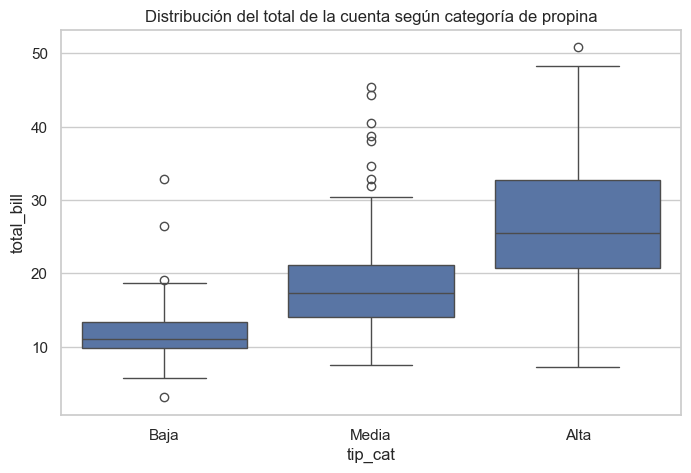

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_tips, x='tip_cat', y='total_bill')
plt.title('Distribución del total de la cuenta según categoría de propina')
plt.show()

## 🌐 4. Consumo de APIs y Transformaciones

## 🧪 Consumo de API de Clima (Open-Meteo)

In [17]:
import pandas as pd

# URL para datos de clima en Quito
url_quito = "https://api.open-meteo.com/v1/forecast?latitude=-0.23&longitude=-78.52&daily=temperature_2m_max,temperature_2m_min&timezone=auto"
response_quito = requests.get(url_quito)

print(f"Código de estado para Quito: {response_quito.status_code}")

if response_quito.status_code == 200:
    data_quito = response_quito.json()
    df_clima_quito = pd.DataFrame(data_quito['daily'])
    print("\nDatos de clima de Quito (primeras 5 filas):")
    print(df_clima_quito.head())
else:
    print("Error al obtener datos de la API de clima para Quito.")


Código de estado para Quito: 200

Datos de clima de Quito (primeras 5 filas):
         time  temperature_2m_max  temperature_2m_min
0  2025-07-24                17.3                 8.8
1  2025-07-25                17.7                 7.7
2  2025-07-26                18.5                 7.5
3  2025-07-27                19.1                 7.8
4  2025-07-28                18.1                 9.0


In [18]:
# URL para datos de clima en Guayaquil
url_gye = "https://api.open-meteo.com/v1/forecast?latitude=-2.19616&longitude=-79.88621&daily=temperature_2m_max,temperature_2m_min&timezone=auto"
response_gye = requests.get(url_gye)

print(f"\nCódigo de estado para Guayaquil: {response_gye.status_code}")

if response_gye.status_code == 200:
    data_gye = response_gye.json()
    df_clima_gye = pd.DataFrame(data_gye['daily'])
    print("\nDatos de clima de Guayaquil (primeras 5 filas):")
    print(df_clima_gye.head())
else:
    print("Error al obtener datos de la API de clima para Guayaquil.")



Código de estado para Guayaquil: 200

Datos de clima de Guayaquil (primeras 5 filas):
         time  temperature_2m_max  temperature_2m_min
0  2025-07-24                28.4                20.8
1  2025-07-25                28.7                20.5
2  2025-07-26                28.5                20.1
3  2025-07-27                27.7                20.3
4  2025-07-28                30.0                20.3


Usamos la librería `requests` para hacer llamadas a APIs y `pd.DataFrame()` para convertir la respuesta JSON a un formato tabular.

### **Tarea Adicional para el Estudiante (Compartir Código y Criterios):**

*   **Comparación de Temperaturas:** Calcula la temperatura promedio máxima y mínima para Quito y Guayaquil a partir de los DataFrames `df_clima_quito` y `df_clima_gye`.
*   ¿Qué otros parámetros podrías pasar a la URL de la API de Open-Meteo para obtener información adicional (ej. `current_weather`, `hourly`)? ¿Cómo procesarías esos datos si fueran listas anidadas?


In [ ]:
# Tu código de comparación de temperaturas y comentarios aquí

## 🧪 Consumo de API de Usuarios (JSONPlaceholder) y Procesamiento Estructurado

In [19]:
json_api_url_users = 'https://jsonplaceholder.typicode.com/users'

# Leer directamente con pandas
df_users = pd.read_json(json_api_url_users)

# Procesar la columna 'address' para aplanarla
df_users['calle'] = df_users['address'].apply(lambda x: x.get('street'))
df_users['ciudad'] = df_users['address'].apply(lambda x: x.get('city'))
df_users['zipcode'] = df_users['address'].apply(lambda x: x.get('zipcode'))

print("Datos de usuarios con dirección aplanada:")
print(df_users[['name', 'email', 'calle', 'ciudad', 'zipcode']].head())

# Agrupar por ciudad y contar usuarios
usuarios_por_ciudad = df_users.groupby('ciudad').size().reset_index(name='numero_usuarios')
print("\nNúmero de usuarios por ciudad:")
print(usuarios_por_ciudad)


Datos de usuarios con dirección aplanada:
               name                      email              calle  \
0     Leanne Graham          Sincere@april.biz        Kulas Light   
1      Ervin Howell          Shanna@melissa.tv      Victor Plains   
2  Clementine Bauch         Nathan@yesenia.net  Douglas Extension   
3  Patricia Lebsack  Julianne.OConner@kory.org        Hoeger Mall   
4  Chelsey Dietrich   Lucio_Hettinger@annie.ca       Skiles Walks   

          ciudad     zipcode  
0    Gwenborough  92998-3874  
1    Wisokyburgh  90566-7771  
2  McKenziehaven  59590-4157  
3    South Elvis  53919-4257  
4     Roscoeview       33263  

Número de usuarios por ciudad:
           ciudad  numero_usuarios
0       Aliyaview                1
1  Bartholomebury                1
2     Gwenborough                1
3       Howemouth                1
4     Lebsackbury                1
5   McKenziehaven                1
6      Roscoeview                1
7   South Christy                1
8     Sout

Aplanamos la columna `address` para poder usarla en agrupaciones. Luego, contamos cuántos usuarios hay en cada ciudad.

### **Tarea Adicional para el Estudiante (Compartir Código y Criterios):**

*   **Información de la Compañía:** La columna `company` en la API de usuarios también contiene un diccionario con información (nombre, catchPhrase). Extrae el `name` de la compañía y la `catchPhrase` en nuevas columnas. Luego, cuenta cuántos usuarios trabajan en cada compañía.
*   ¿Qué tipo de preguntas podrías responder usando la información de la compañía y la localización de los usuarios?


In [ ]:
# Tu código para procesar la columna company y comentarios aquí

## 🧪 Consumo de API de Salud (GHO API)

In [32]:
# URL para datos de Esperanza de Vida al Nacer (ejemplo de datos anidados)
# Nota: Esta API puede cambiar o tener diferentes endpoints. Usamos un ejemplo típico.
# La estructura de respuesta de esta API suele ser más compleja con paginación y filtros.
# Para simplificar, usaremos un ejemplo teórico de cómo manejar una respuesta anidada.

# Suponiendo que obtenemos una respuesta JSON con una estructura similar a esto:
# {
#   "@odata.context": "...",
#   "value": [
#     {"IndicatorCode": "WHOSIS_000001", "Location": "Indonesia", "Dim1Value": "Female", "TimeDimValue": "2018", "NumericValue": 69.4},
#     {"IndicatorCode": "WHOSIS_000001", "Location": "Indonesia", "Dim1Value": "Male", "TimeDimValue": "2018", "NumericValue": 68.7},
#     {"IndicatorCode": "WHOSIS_000001", "Location": "Bhutan", "Dim1Value": "Female", "TimeDimValue": "2018", "NumericValue": 72.7},
#     ...
#   ]
# }


# Simulemos la obtención del DataFrame para el ejemplo práctico
data_simulada_salud = {
    "value": [
        {"IndicatorCode": "WHOSIS_000001", "Location": "Ecuador", "Dim1Value": "Female", "TimeDimValue": "2018", "NumericValue": 69.4},
        {"IndicatorCode": "WHOSIS_000001", "Location": "Ecuador", "Dim1Value": "Male", "TimeDimValue": "2018", "NumericValue": 68.7},
        {"IndicatorCode": "WHOSIS_000001", "Location": "Colombia", "Dim1Value": "Female", "TimeDimValue": "2018", "NumericValue": 72.7},
        {"IndicatorCode": "WHOSIS_000001", "Location": "Colombia", "Dim1Value": "Male", "TimeDimValue": "2002", "NumericValue": 67.1},
        {"IndicatorCode": "WHOSIS_000001", "Location": "Peru", "Dim1Value": "Female", "TimeDimValue": "2015", "NumericValue": 76.1},
        {"IndicatorCode": "WHOSIS_000001", "Location": "Peru", "Dim1Value": "Male", "TimeDimValue": "2015", "NumericValue": 75.8},
    ]
}
df_salud = pd.DataFrame(data_simulada_salud['value'])

print("Datos simulados de Esperanza de Vida al Nacer (primeras 5 filas):")
print(df_salud.head())
print("\nColumnas disponibles:", df_salud.columns)


Datos simulados de Esperanza de Vida al Nacer (primeras 5 filas):
   IndicatorCode  Location Dim1Value TimeDimValue  NumericValue
0  WHOSIS_000001   Ecuador    Female         2018          69.4
1  WHOSIS_000001   Ecuador      Male         2018          68.7
2  WHOSIS_000001  Colombia    Female         2018          72.7
3  WHOSIS_000001  Colombia      Male         2002          67.1
4  WHOSIS_000001      Peru    Female         2015          76.1

Columnas disponibles: Index(['IndicatorCode', 'Location', 'Dim1Value', 'TimeDimValue',
       'NumericValue'],
      dtype='object')


### **Tarea Adicional para el Estudiante (Compartir Código y Criterios):**

*   **Análisis de Esperanza de Vida:**
    1.  Renombra las columnas para que sean más legibles: `Location` -> `pais`, `Dim1Value` -> `sexo`, `TimeDimValue` -> `año`, `NumericValue` -> `esperanza_vida`.
    2.  Calcula la esperanza de vida promedio para cada `pais`, considerando solo los datos del año 2018. Si no hay datos de 2018 para algún país, puedes ignorarlo o asignar un valor (ej. NaN).
*  ¿Cómo podrías manejar datos que tienen múltiples años y sexos para un mismo país si quisieras hacer un análisis de tendencia a lo largo del tiempo?


In [ ]:
# Tu código para el análisis de esperanza de vida y comentarios aquí

In [26]:
# En un caso real, necesitaríamos hacer una petición GET:
url_salud = "https://ghoapi.azureedge.net/api/WHOSIS_000001"
response_salud = requests.get(url_salud)
data_salud = response_salud.json()
df_salud = pd.DataFrame(data_salud['value'])

In [27]:
df_salud

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,5471166,WHOSIS_000001,COUNTRY,SUR,AMR,YEAR,Americas,SEX,2019,SEX_BTSX,...,None,73.0 [72.6-73.4],73.022859,72.626240,73.417393,None,2024-08-02T09:43:39.193+02:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
1,856,WHOSIS_000001,COUNTRY,SOM,EMR,YEAR,Eastern Mediterranean,SEX,2008,SEX_MLE,...,None,48.0 [46.7-49.6],48.037541,46.716784,49.628457,None,2024-08-02T09:43:39.193+02:00,2008,2008-01-01T00:00:00+01:00,2008-12-31T00:00:00+01:00
2,1045,WHOSIS_000001,COUNTRY,BTN,SEAR,YEAR,South-East Asia,SEX,2002,SEX_BTSX,...,None,67.8 [67.1-68.6],67.845665,67.083124,68.558745,None,2024-08-02T09:43:39.193+02:00,2002,2002-01-01T00:00:00+01:00,2002-12-31T00:00:00+01:00
3,3548,WHOSIS_000001,COUNTRY,BHR,EMR,YEAR,Eastern Mediterranean,SEX,2011,SEX_FMLE,...,None,75.2 [75.1-75.4],75.205359,75.050478,75.385175,None,2024-08-02T09:43:39.193+02:00,2011,2011-01-01T00:00:00+01:00,2011-12-31T00:00:00+01:00
4,6793,WHOSIS_000001,COUNTRY,SAU,EMR,YEAR,Eastern Mediterranean,SEX,2005,SEX_FMLE,...,None,73.1 [72.8-73.5],73.122274,72.806453,73.478948,None,2024-08-02T09:43:39.193+02:00,2005,2005-01-01T00:00:00+01:00,2005-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,10075562,WHOSIS_000001,COUNTRY,UGA,AFR,YEAR,Africa,SEX,2007,SEX_FMLE,...,None,59.0 [58.1-60.0],59.008192,58.090032,59.956274,None,2024-08-02T09:43:39.193+02:00,2007,2007-01-01T00:00:00+01:00,2007-12-31T00:00:00+01:00
12932,10077027,WHOSIS_000001,COUNTRY,DZA,AFR,YEAR,Africa,SEX,2015,SEX_BTSX,...,None,76.1 [75.8-76.4],76.069092,75.792205,76.413973,None,2024-08-02T09:43:39.193+02:00,2015,2015-01-01T00:00:00+01:00,2015-12-31T00:00:00+01:00
12933,10079901,WHOSIS_000001,COUNTRY,CHN,WPR,YEAR,Western Pacific,SEX,2013,SEX_FMLE,...,None,79.1 [78.8-79.5],79.070282,78.768764,79.460209,None,2024-08-02T09:43:39.193+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
12934,10080069,WHOSIS_000001,COUNTRY,GUY,AMR,YEAR,Americas,SEX,2002,SEX_FMLE,...,None,67.8 [67.4-68.3],67.763888,67.391640,68.255974,None,2024-08-02T09:43:39.193+02:00,2002,2002-01-01T00:00:00+01:00,2002-12-31T00:00:00+01:00


In [25]:
url = 'https://ghoapi.azureedge.net/api/WHOSIS_000001'
resp = requests.get(url)
data = resp.json()
data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#WHOSIS_000001',
 'value': [{'Id': 5471166,
   'IndicatorCode': 'WHOSIS_000001',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'SUR',
   'ParentLocationCode': 'AMR',
   'TimeDimType': 'YEAR',
   'ParentLocation': 'Americas',
   'Dim1Type': 'SEX',
   'TimeDim': 2019,
   'Dim1': 'SEX_BTSX',
   'Dim2Type': None,
   'Dim2': None,
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '73.0 [72.6-73.4]',
   'NumericValue': 73.02285851,
   'Low': 72.62624037,
   'High': 73.41739297,
   'Comments': None,
   'Date': '2024-08-02T09:43:39.193+02:00',
   'TimeDimensionValue': '2019',
   'TimeDimensionBegin': '2019-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '2019-12-31T00:00:00+01:00'},
  {'Id': 856,
   'IndicatorCode': 'WHOSIS_000001',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'SOM',
   'ParentLocationCode': 'EMR',
   'TimeDimType': 'YEAR',
   'ParentLocation': 'Eastern Me

['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type', 'TimeDim', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low', 'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd']


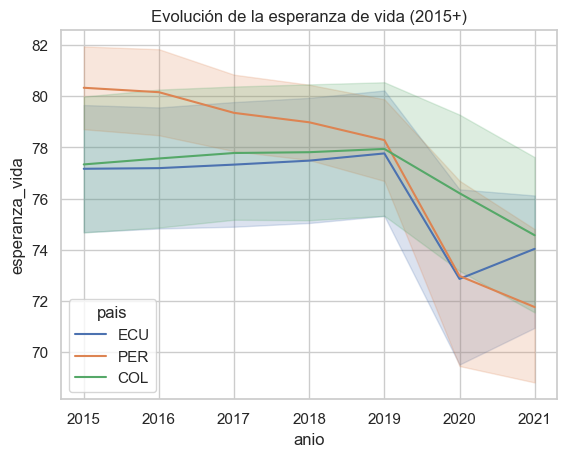

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'value' in data:
    # Aplanar los datos
    df_vida = pd.json_normalize(data['value'])

    # Verifica qué nombres de columna están disponibles
    print(df_vida.columns.tolist())  # útil en clase también

    # Buscar equivalentes a 'Country' y 'TimeDim'
    columnas_posibles = ['SpatialDim', 'TimeDim', 'NumericValue']
    df_vida = df_vida[columnas_posibles]

    # Renombrar columnas
    df_vida.columns = ['pais', 'anio', 'esperanza_vida']
    df_vida = df_vida[df_vida['anio'] >= 2015]
    
    # Filtrar países
    paises = ['ECU', 'COL', 'PER']  # códigos ISO de países
    df_paises = df_vida[df_vida['pais'].isin(paises)]

    # Graficar
    sns.lineplot(data=df_paises, x='anio', y='esperanza_vida', hue='pais')
    plt.title('Evolución de la esperanza de vida (2015+)')
    plt.show()

else:
    print("No se encontraron datos en la API")


In [30]:
resumen_vida = df_vida.groupby('pais')['esperanza_vida'].mean().sort_values(ascending=False)
resumen_vida.head(10)

pais
JPN    84.308345
SGP    83.512563
KOR    83.152042
CHE    83.075652
AUS    82.813349
LUX    82.682646
ESP    82.585821
ITA    82.458153
NOR    82.456397
ISL    82.376187
Name: esperanza_vida, dtype: float64